We compare Twitch viewership data of Starcraft 2 with the amount of competetive matches played in the same period. 

In [1]:
import pandas as pd

# load the data
players = pd.read_csv('player_db.csv', low_memory=False)
matches = pd.read_csv('match_db.csv', low_memory=False)

matches['YEAR_MONTH'] = matches['DATE'].map(lambda s: s[:7])
competetive_matches_per_ym = matches.groupby('YEAR_MONTH').size()

# the timeframe we're interested in 
months_range = [str(y) + '-' + (str(m) if m in [10, 11, 12] else '0' + str(m))
                for y in range(2016,2020) for m in range(1, 13)][:-9]
quarters_range = [str(y) + ' Q' + str(q) for q in range(1,5) for y in range(2016, 2020)][:-3]

# average viewers in a given month, starting from January 2016 to March 2019
# courtesy of SullyGnome 
average_viewers = [8838, 8108, 7108, 5346, 5848, 5169, 6016, 6048, 4662, 5158, 6954, 5773, 
                  7065, 6327, 6445, 5376, 4309, 4904, 5680, 4423, 4631, 4562, 6741, 4912,
                  5611, 5863, 11220, 8416, 5867, 6897, 7246, 7203, 6251, 6229, 8448, 5283,
                  6330, 9203, 7669]

def into_quarters(l):
    return [l[3*i] + l[3*i+1] + l[3*i+2] for i in range(int(len(l)/3))]

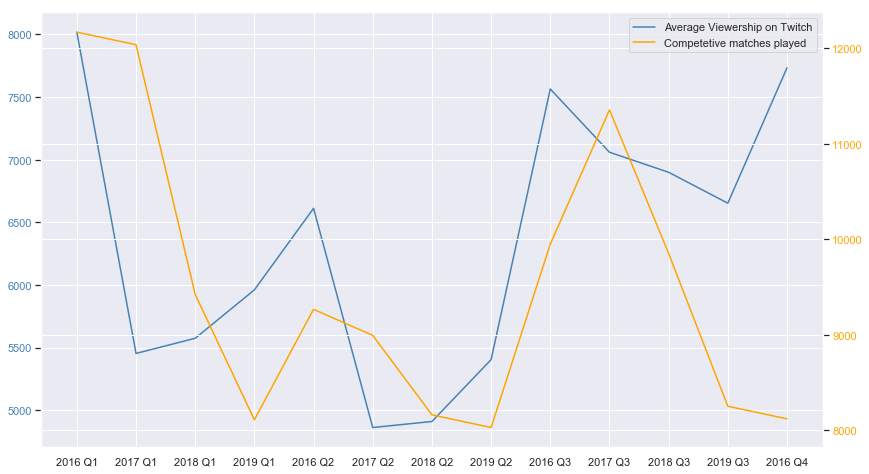

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as srs

srs.set()
fig, ax1 = plt.subplots(figsize=(14,8))

color1 = 'steelblue'
l1, = ax1.plot(quarters_range, [x / 3 for x in into_quarters(average_viewers)] ,color=color1)
ax1.tick_params(axis='y',labelcolor=color1)

color2 = 'orange'
ax2 = ax1.twinx() 
l2, = ax2.plot(quarters_range, into_quarters([competetive_matches_per_ym[ym] for ym in months_range]), 
         color=color2)
ax2.tick_params(axis='y', labelcolor=color2)


plt.legend([l1, l2],["Average Viewership on Twitch", "Competetive matches played"])
plt.show()

It looks that the two are indeed quite correlated - what's the Pearson coefficient? 

In [8]:
from scipy.stats.stats import pearsonr

pearsonr(average_viewers, [competetive_matches_per_ym[ym] for ym in months_range])

(0.274321346575141, 0.0910295365644084)

Thus, with a large probability the two are in fact positively correlated, as one would expect. In fact, one can verify on many websites collecting Twitch statistics that in the case of Starcraft 2, the most popular streaming channels are consistently the ones related to eSports. It would be interesting to see if:
- how does this compare to different video games, especially younger ones where 